In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [25]:
train = pd.read_csv("Datasets/Predict_Future_Sales/sales_train.csv")
test = pd.read_csv("Datasets/Predict_Future_Sales/test.csv")
cat = pd.read_csv("Datasets/Predict_Future_Sales/item_categories.csv")
shop = pd.read_csv("Datasets/Predict_Future_Sales/shops.csv")
item = pd.read_csv("Datasets/Predict_Future_Sales/items.csv")

In [26]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [27]:
train.shape

(2935849, 6)

In [28]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

## What is an outlier?
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

## What are the impacts of having outliers in a dataset?
1) It causes various problems during our statistical analysis
2) It may cause a significant impact on the mean and the standard deviation

<AxesSubplot:xlabel='item_price'>

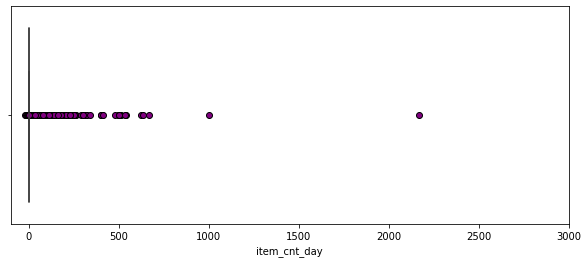

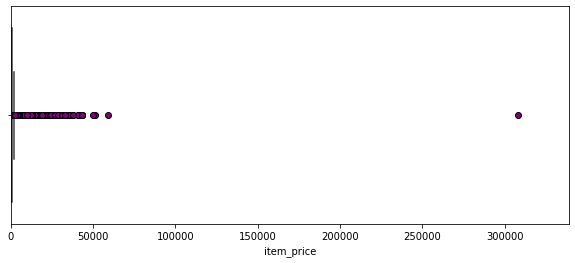

In [29]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price, flierprops=flierprops)

 We'll remove the obvious outliers in the dataset - the items that sold more than 1000 in one day and the item with price greater than 300,000.
 And we will alsoi Remove any rows from train where item price is negative as there could be a sitution for a Refund so we will not count That.

In [30]:
train = train[(train.item_price < 300000 )& (train.item_cnt_day < 1000)]
train = train[train.item_price > 0].reset_index(drop = True)
train.loc[train.item_cnt_day < 1, "item_cnt_day"] = 0 # All the values that are less than 1 will became 0

In [31]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,0.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [32]:
train = train[(train.item_price<100000)&(train.item_price>0)]
train = train[(train.item_cnt_day>0)&(train.item_cnt_day<1000)]

# Remove duplicate shops
train.loc[train.shop_id==0, 'shop_id'] = 57
test.loc[test.shop_id==0, 'shop_id'] = 57

train.loc[train.shop_id==1, 'shop_id'] = 58
test.loc[test.shop_id==1, 'shop_id'] = 58

train.loc[train.shop_id==10, 'shop_id'] = 11
test.loc[test.shop_id==10, 'shop_id'] = 11